In [7]:
# LSTM(Long Short Term Memory)신경망 훈련하기
# :순환신경망의 셀(Cell)로 이전 타입스템의 샘플을 기억하고 있음.
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)


In [8]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [9]:
# Sequence Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [8]:
# LSTM신경망 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout, SimpleRNN , Embedding , LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from tensorflow import keras


model = Sequential()

model.add(Embedding(500,16))
model.add(LSTM(8))
model.add(Dense(1, activation='sigmoid'))  

model.build(input_shape=(None, 100))     ###########

model.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # 기본값 : 0.0001

model.compile(optimizer= rmsprop , loss='binary_crossentropy', metrics=['accuracy'])  

mc = ModelCheckpoint('../Data/best_lstm.keras', monitor='val_loss', save_best_only=True)
es = EarlyStopping(patience=3, restore_best_weights=True)


history = model.fit(
    train_seq, train_target,         # one hot encoding 안한다
    epochs=100, batch_size = 64,
    validation_data=(val_seq, val_target),
    callbacks=[mc, es]
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5390 - loss: 0.6926 - val_accuracy: 0.5666 - val_loss: 0.6919
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6012 - loss: 0.6906 - val_accuracy: 0.6062 - val_loss: 0.6892
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6301 - loss: 0.6857 - val_accuracy: 0.6462 - val_loss: 0.6813
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6639 - loss: 0.6686 - val_accuracy: 0.6942 - val_loss: 0.6477
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7155 - loss: 0.5983 - val_accuracy: 0.7212 - val_loss: 0.5735
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7387 - loss: 0.5576 - val_accuracy: 0.7476 - val_loss: 0.5500
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7555 - loss: 0.5356 - val_accuracy: 0.7568 - val_loss: 0.5299
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7669 - loss: 0.5180 - 

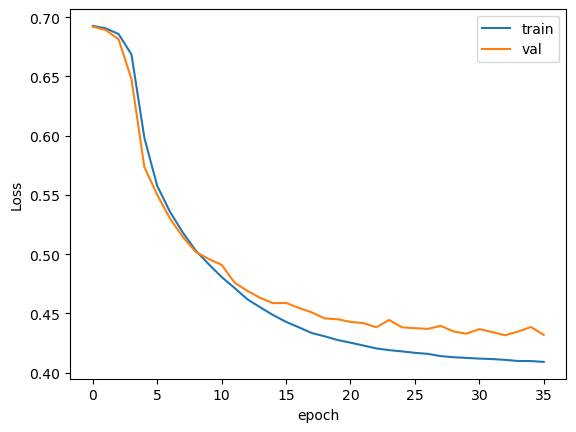

In [10]:
# > 전체 댓글의 토큰중 100개만 학습하였더니 거의 80%의 예측력
#시각화 해보기

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()


In [11]:
### 순환층에 드롭아웃 적용하기
# LSTM신경망 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout, SimpleRNN , Embedding , LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from tensorflow import keras


model2 = Sequential()

model2.add(Embedding(500,16))
model2.add(LSTM(8, dropout=0.3))                    #  dropout=0.3 적용하기
model2.add(Dense(1, activation='sigmoid'))  

model2.build(input_shape=(None, 100))     ###########

model2.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # 기본값 : 0.0001

model2.compile(optimizer= rmsprop , loss='binary_crossentropy', metrics=['accuracy'])  

mc = ModelCheckpoint('../Data/best_lstm.keras', monitor='val_loss', save_best_only=True)
es = EarlyStopping(patience=3, restore_best_weights=True)


history = model2.fit(
    train_seq, train_target,         # one hot encoding 안한다
    epochs=100, batch_size = 64,
    validation_data=(val_seq, val_target),
    callbacks=[mc, es]
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5149 - loss: 0.6929 - val_accuracy: 0.5660 - val_loss: 0.6925
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5538 - loss: 0.6922 - val_accuracy: 0.5878 - val_loss: 0.6916
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5927 - loss: 0.6907 - val_accuracy: 0.6034 - val_loss: 0.6898
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6083 - loss: 0.6881 - val_accuracy: 0.6248 - val_loss: 0.6861
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6359 - loss: 0.6818 - val_accuracy: 0.6610 - val_loss: 0.6761
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6796 - loss: 0.6588 - val_accuracy: 0.7162 - val_loss: 0.6265
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7028 - loss: 0.6053 - val_accuracy: 0.7176 - val_loss: 0.5877
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7237 - loss: 0.5787 - 

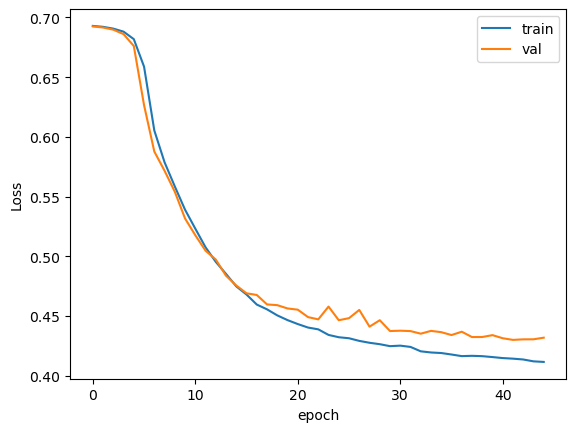

In [12]:
# > 전체 댓글의 토큰중 100개만 학습하였더니 거의 80%의 예측력
#시각화 해보기

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

In [10]:
# 2개층을 연결하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout, SimpleRNN , Embedding , LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from tensorflow import keras

model2 = Sequential()

model2.add(Embedding(500,16))
model2.add(LSTM(8, dropout=0.3, return_sequences=True))                    #  dropout=0.3 적용하기
model2.add(LSTM(8, dropout=0.3))                    #  dropout=0.3 적용하기
model2.add(Dense(1, activation='sigmoid'))  

model2.build(input_shape=(None, 100))     ###########

model2.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # 기본값 : 0.0001

model2.compile(optimizer= rmsprop , loss='binary_crossentropy', metrics=['accuracy'])  

mc = ModelCheckpoint('../Data/best_lstm.keras', monitor='val_loss', save_best_only=True)
es = EarlyStopping(patience=3, restore_best_weights=True)


history = model2.fit(
    train_seq , train_target,                # one hot encoding 안한다
    epochs=100, batch_size = 64,
    validation_data=(val_seq, val_target),
    callbacks=[mc, es]
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.5328 - loss: 0.6927 - val_accuracy: 0.5354 - val_loss: 0.6924
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.5673 - loss: 0.6916 - val_accuracy: 0.5902 - val_loss: 0.6907
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5912 - loss: 0.6882 - val_accuracy: 0.6504 - val_loss: 0.6843
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.6320 - loss: 0.6760 - val_accuracy: 0.6770 - val_loss: 0.6604
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.6729 - loss: 0.6315 - val_accuracy: 0.6946 - val_loss: 0.5913
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7190 - loss: 0.5724 - val_accuracy: 0.7282 - val_loss: 0.5456
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7383 - loss: 0.5419 - val_accuracy: 0.7494 - val_loss: 0.5154
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7587 - loss: 0

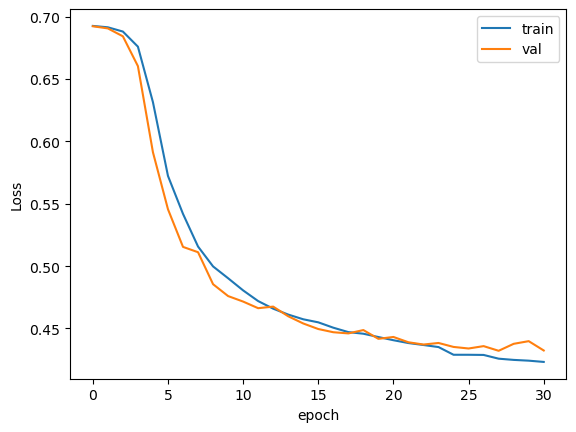

In [12]:
# > 전체 댓글의 토큰중 100개만 학습하였더니 거의 80%의 예측력
#시각화 해보기

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

In [13]:
# GRU(Gated Recurrent Unit) 신경망
# lstm 간소화 버전
# 2개층을 연결하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout, SimpleRNN , Embedding , LSTM, GRU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from tensorflow import keras

model3 = Sequential()

model3.add(Embedding(500,16))
# model3.add(LSTM(8, dropout=0.3, return_sequences=True))                    #  dropout=0.3 적용하기
model3.add(GRU(8, dropout=0.3))                    #  dropout=0.3 적용하기
model3.add(Dense(1, activation='sigmoid'))  

model3.build(input_shape=(None, 100))     ###########

model3.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # 기본값 : 0.0001

model3.compile(optimizer= rmsprop , loss='binary_crossentropy', metrics=['accuracy'])  

mc = ModelCheckpoint('../Data/best_gru.keras', monitor='val_loss', save_best_only=True)
es = EarlyStopping(patience=3, restore_best_weights=True)


history = model3.fit(
    train_seq , train_target,                # one hot encoding 안한다
    epochs=100, batch_size = 64,
    validation_data=(val_seq, val_target),
    callbacks=[mc, es]
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5113 - loss: 0.6928 - val_accuracy: 0.5146 - val_loss: 0.6923
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5429 - loss: 0.6913 - val_accuracy: 0.5448 - val_loss: 0.6909
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5688 - loss: 0.6894 - val_accuracy: 0.5698 - val_loss: 0.6888
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5838 - loss: 0.6868 - val_accuracy: 0.5832 - val_loss: 0.6857
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6015 - loss: 0.6826 - val_accuracy: 0.5970 - val_loss: 0.6813
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6102 - loss: 0.6767 - val_accuracy: 0.6040 - val_loss: 0.6744
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6267 - loss: 0.6673 - val_accuracy: 0.6202 - val_loss: 0.6637
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6400 - loss: 0.6530 - 

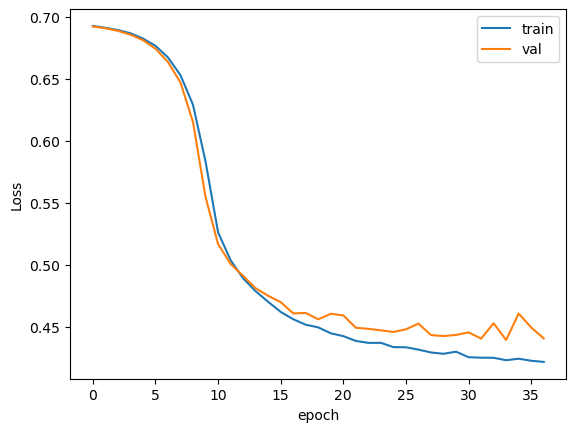

In [14]:
# > 전체 댓글의 토큰중 100개만 학습하였더니 거의 80%의 예측력
#시각화 해보기

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

In [17]:
#LSTM
test_seq = pad_sequences(test_input, maxlen=100)
model = keras.models.load_model("../Data/best_lstm.keras")
model.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8001 - loss: 0.4311


[0.43113651871681213, 0.8001199960708618]

In [ ]:
#LSTM
test_seq = pad_sequences(test_input, maxlen=100)
model = keras.models.load_model("../Data/best_lstm.keras")
model.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7988 - loss: 0.4356


[0.43562597036361694, 0.7987599968910217]

In [22]:
#RNN
test_seq = pad_sequences(test_input, maxlen=100)
test_oh = keras.utils.to_categorical(test_seq)
model = keras.models.load_model("../Data/best_simplernn.keras")
model.evaluate(test_oh, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7791 - loss: 0.4872


[0.48723870515823364, 0.7791200280189514]

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# 샘플 시퀀스 (단어 인덱스 시퀀스)
sequences = [
    [1, 3, 4],
    [2, 5]
]

# 1. 패딩 (길이를 5로 맞춤, 앞쪽에 0 채움)
padded_seq = pad_sequences(sequences, maxlen=5)
print("패딩된 시퀀스:")
print(padded_seq)
print("패딩된 시퀀스 shape:", padded_seq.shape)

# 2. to_categorical로 원-핫 인코딩 (num_classes=6)
one_hot_seq = to_categorical(padded_seq, num_classes=6)
print("\n원-핫 인코딩된 시퀀스:")
print(one_hot_seq)
print("원-핫 인코딩된 시퀀스 shape:", one_hot_seq.shape)

패딩된 시퀀스:
[[0 0 1 3 4]
 [0 0 0 2 5]]
패딩된 시퀀스 shape: (2, 5)

원-핫 인코딩된 시퀀스:
[[[1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0.]]

 [[1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1.]]]
원-핫 인코딩된 시퀀스 shape: (2, 5, 6)
